<a href="https://colab.research.google.com/drive/1sfa3fN9W0nExpGwIwaX36arm1xYkH2PN" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Project at Glance

**1. Basic Setup** <br>
**2. Installation of Dependencies**<br>
**3. Data Preparation**<br>
**4. Data Visualization**<br>
**5. Data Pre-Processing**<br>
**6. Model Creation**<br>
**7. Training and Evaluation**<br>
**8. Test Set Prediction**<br>
**9. Live Demonstration** <br>


# About Project 

*  first step is to actually load the data into a machine understandable format.
* For this, we simply take values after every specific time steps. For example; in a 2 second audio file, we extract values at half a second. This is called sampling of audio data, and the rate at which it is sampled is called the sampling rate. 

![SpeechWave](https://s3-ap-south-1.amazonaws.com/av-blog-media/wp-content/uploads/2017/08/23210623/sound.png)

* Another way of representing audio data is by converting it into a different domain of data representation, namely the **frequency domain**

* sampling of data required much mire data points 
* if we represent audio data in frequency domain, much less computational space is required. 



* Now the next step is to extract features from this audio representations, so that our algorithm can work on these features and perform the task it is designed for. Here’s a visual representation of the categories of audio features that can be extracted.

![Block Digram](https://s3-ap-south-1.amazonaws.com/av-blog-media/wp-content/uploads/2017/08/23233229/audio-features.png)

* After extracting these features, it is then sent to the machine learning model for further analysis.


# 1. Basic Setup

In [1]:
# Load the Drive helper and mount
from google.colab import drive

# This will prompt for authorization.
drive.mount('/content/drive')

Go to this URL in a browser: https://accounts.google.com/o/oauth2/auth?client_id=947318989803-6bn6qk8qdgf4n4g3pfee6491hc0brc4i.apps.googleusercontent.com&redirect_uri=urn%3Aietf%3Awg%3Aoauth%3A2.0%3Aoob&scope=email%20https%3A%2F%2Fwww.googleapis.com%2Fauth%2Fdocs.test%20https%3A%2F%2Fwww.googleapis.com%2Fauth%2Fdrive%20https%3A%2F%2Fwww.googleapis.com%2Fauth%2Fdrive.photos.readonly%20https%3A%2F%2Fwww.googleapis.com%2Fauth%2Fpeopleapi.readonly&response_type=code

Enter your authorization code:
··········
Mounted at /content/drive


### Adjusting Path for this Notebook

In [2]:
cd drive/'My Drive'/'Colab Notebooks'/'Emotion Speech Recognition'/

/content/drive/My Drive/Colab Notebooks/Emotion Speech Recognition


In [3]:
# Now above cell output is our path which is in current working directory
!ls

Dataset		    images			      Trained_Models
demo_audio.wav	    Others			      utils
features_dataframe  speech_emotion_recognition.ipynb


# 2. Installation of Dependencies



Essential requirement of of our project :
1. **Python 3.7**
2. **Librosa **
3. **PyTorch **
4. **Keras**
5. **GPU**

We have Already installed this frameworks and packages.

In [4]:
# Provides a way of using operating system dependent functionality. 
import os

# LibROSA provides the audio analysis
import librosa
# Need to implictly import from librosa
import librosa.display

# Import the audio playback widget
import IPython.display as ipd
from IPython.display import Image

# Enable plot in the notebook
% pylab inline
%matplotlib inline
import matplotlib.pyplot as plt

# These are generally useful to have around
import numpy as np
import pandas as pd


# To build Neural Network and Create desired Model
import keras
from keras.models import Model
from keras.models import Sequential
from keras.layers import Conv1D, MaxPooling1D #, AveragePooling1D
from keras.layers import Flatten, Dropout, Activation # Input, 
from keras.layers import Dense #, Embedding
from keras.utils import np_utils
from sklearn.preprocessing import LabelEncoder

Populating the interactive namespace from numpy and matplotlib


Using TensorFlow backend.


# 3. Data Preparation


### Plotting the audio file's waveform and its spectrogram

In [5]:
data, sampling_rate = librosa.load('Dataset/anger/anger016.wav')
# To play audio this in the jupyter notebook
ipd.Audio('Dataset/anger/anger016.wav')

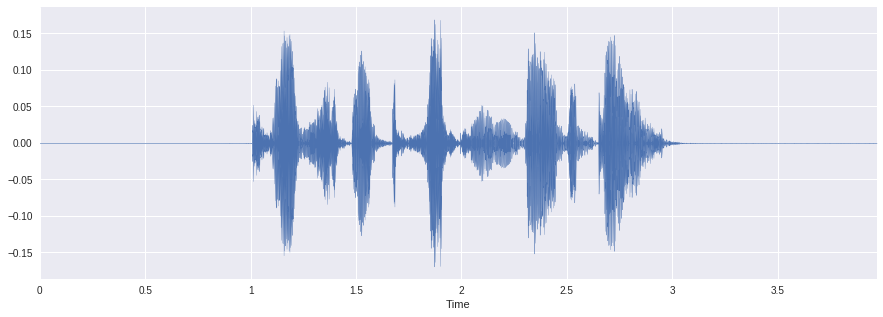

In [6]:
plt.figure(figsize=(15, 5))
librosa.display.waveplot(data, sr=sampling_rate)

### Setup the Basic Paramter

In [0]:
dataset_path = os.path.abspath('./Dataset')
destination_path = os.path.abspath('./')
# To shuffle the dataset instances/records
randomize = True
# for spliting dataset into training and testing dataset
split = 0.8
# Number of sample per second e.g. 16KHz
sampling_rate = 20000 
emotions=["anger","disgust","fear","happy","neutral", "sad", "surprise"]


### Converting Dataset in CSV format

it will cause easy operation on Dataset.

In [0]:
# loading dataframes using dataset module 
from utils import dataset
df, train_df, test_df = dataset.create_and_load_meta_csv_df(dataset_path, destination_path, randomize, split)

In [9]:
print('Dataset samples  : ', len(df),"\nTraining Samples : ", len(train_df),"\ntesting Samples  : ", len(test_df))

Dataset samples  :  2556 
Training Samples :  2044 
testing Samples  :  512


# 4. Data Visualization

Let's understand what is our dataset.

In [10]:
df.head()

,path,label
0,/content/drive/My Drive/Colab Notebooks/Emotio...,3
1,/content/drive/My Drive/Colab Notebooks/Emotio...,2
2,/content/drive/My Drive/Colab Notebooks/Emotio...,2
3,/content/drive/My Drive/Colab Notebooks/Emotio...,0
4,/content/drive/My Drive/Colab Notebooks/Emotio...,3


In [11]:
print("Actual Audio : ", df['path'][0])
print("Labels       : ", df['label'][0])


Actual Audio :  /content/drive/My Drive/Colab Notebooks/Emotion Speech Recognition/Dataset/happy/happy279.wav
Labels       :  3



### Labels Assigned for emotions : 
- 0 : anger
- 1 : disgust
- 2 : fear
- 3 : happy
- 4 : neutral 
- 5 : sad
- 6 : surprise


In [12]:
unique_labels = train_df.label.unique()
unique_labels.sort()
print("unique labels in Emtion dataset : ")
print(*unique_labels, sep=', ')
unique_labels_counts = train_df.label.value_counts(sort=False)
print("\n\nCount of unique labels in Emtion dataset : ")
print(*unique_labels_counts,sep=', ')

unique labels in Emtion dataset : 
0, 1, 2, 3, 4, 5, 6


Count of unique labels in Emtion dataset : 
355, 192, 353, 351, 255, 339, 199


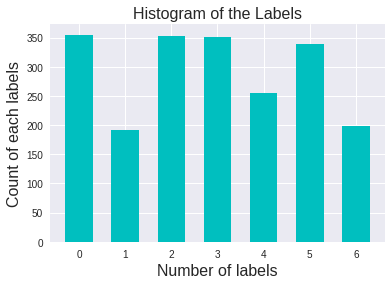

In [13]:
# Histogram of the classes
plt.bar(unique_labels, unique_labels_counts,align = 'center', width=0.6, color = 'c')
plt.xlabel('Number of labels', fontsize=16)
plt.xticks(unique_labels)
plt.ylabel('Count of each labels', fontsize=16)
plt.title('Histogram of the Labels', fontsize=16)
plt.show()

# 5. Data Pre-Processing

### Getting the features of audio files using librosa

Calculating MFCC, Pitch, magnitude, Chroma features.

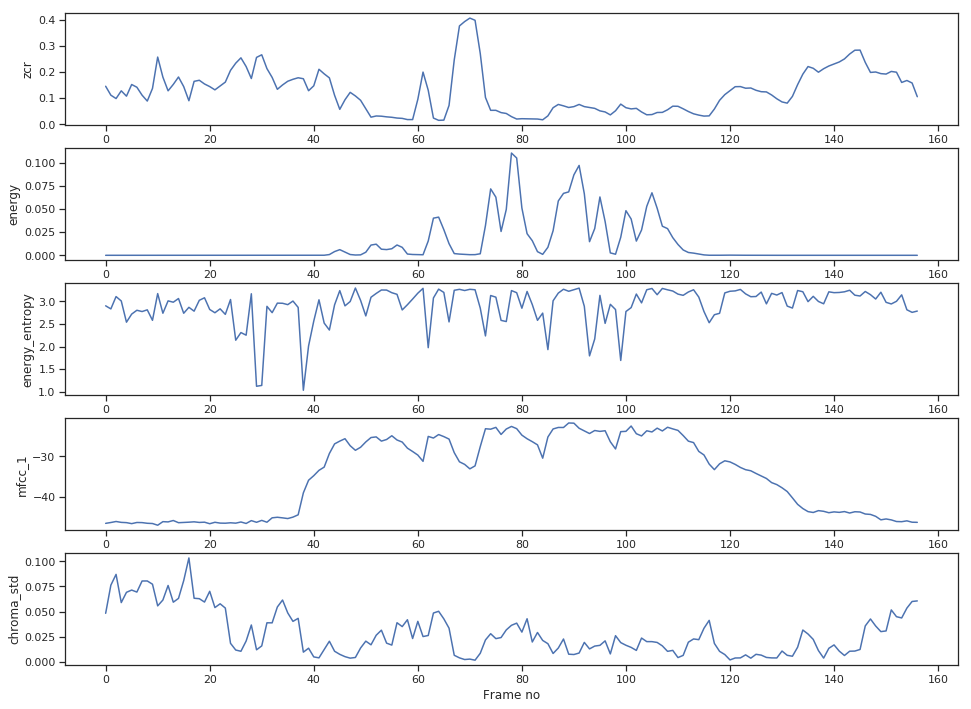

In [14]:
Image('./images/feature_plots.png')

In [0]:
from utils.feature_extraction import get_features_dataframe
from utils.feature_extraction import get_audio_features

trainfeatures, trainlabel = get_the_features(train_df, sampling_rate)
testfeatures, testlabel = get_the_features(test_df, sampling_rate)

# I have ran above 2 lines and get the featured dataframe. 
# and store it into pickle file to use it for later purpose.
# it take too much time to generate features(around 30-40 minutes).

trainfeatures = pd.read_pickle('./features_dataframe/trainfeatures')
trainlabel = pd.read_pickle('./features_dataframe/trainlabel')
testfeatures = pd.read_pickle('./features_dataframe/testfeatures')
testlabel = pd.read_pickle('./features_dataframe/testlabel')

In [16]:
trainfeatures.shape

(2044, 65)

In [0]:
trainfeatures = trainfeatures.fillna(0)
testfeatures = testfeatures.fillna(0)

In [0]:
# By using .ravel() : Converting 2D to 1D e.g. (512,1) -> (512,). To prevent DataConversionWarning

X_train = np.array(trainfeatures)
y_train = np.array(trainlabel).ravel()
X_test = np.array(testfeatures)
y_test = np.array(testlabel).ravel()


In [19]:
y_train[:5]

array([3, 2, 2, 0, 3])

In [0]:
# One-Hot Encoding
lb = LabelEncoder()

y_train = np_utils.to_categorical(lb.fit_transform(y_train))
y_test = np_utils.to_categorical(lb.fit_transform(y_test))

In [21]:
y_train[:5]

array([[0., 0., 0., 1., 0., 0., 0.],
       [0., 0., 1., 0., 0., 0., 0.],
       [0., 0., 1., 0., 0., 0., 0.],
       [1., 0., 0., 0., 0., 0., 0.],
       [0., 0., 0., 1., 0., 0., 0.]], dtype=float32)

### Changing dimension for CNN model

In [0]:
x_traincnn =np.expand_dims(X_train, axis=2)
x_testcnn= np.expand_dims(X_test, axis=2)

In [23]:
x_traincnn.shape

(2044, 65, 1)

# 6. Model Creation

In [24]:
model = Sequential()

model.add(Conv1D(256, 5,padding='same',
                 input_shape=(x_traincnn.shape[1],x_traincnn.shape[2])))
model.add(Activation('relu'))
model.add(Conv1D(128, 5,padding='same'))
model.add(Activation('relu'))
model.add(Dropout(0.1))
model.add(MaxPooling1D(pool_size=(8)))
model.add(Conv1D(128, 5,padding='same',))
model.add(Activation('relu'))
model.add(Conv1D(128, 5,padding='same',))
model.add(Activation('relu'))
model.add(Flatten())
model.add(Dense(y_train.shape[1]))
model.add(Activation('softmax'))
opt = keras.optimizers.rmsprop(lr=0.00001, decay=1e-6)

Instructions for updating:
Colocations handled automatically by placer.
Instructions for updating:
Please use `rate` instead of `keep_prob`. Rate should be set to `rate = 1 - keep_prob`.


In [25]:
model.summary()

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv1d_1 (Conv1D)            (None, 65, 256)           1536      
_________________________________________________________________
activation_1 (Activation)    (None, 65, 256)           0         
_________________________________________________________________
conv1d_2 (Conv1D)            (None, 65, 128)           163968    
_________________________________________________________________
activation_2 (Activation)    (None, 65, 128)           0         
_________________________________________________________________
dropout_1 (Dropout)          (None, 65, 128)           0         
_________________________________________________________________
max_pooling1d_1 (MaxPooling1 (None, 8, 128)            0         
_________________________________________________________________
conv1d_3 (Conv1D)            (None, 8, 128)            82048     
__________

In [0]:
model.compile(loss='categorical_crossentropy', optimizer=opt,metrics=['accuracy'])

# 7. Training and Evaluation

### Removed the whole training part for avoiding unnecessary long epochs list

In [0]:
cnnhistory=model.fit(x_traincnn, y_train, batch_size=16, epochs=400, validation_data=(x_testcnn, y_test))

Instructions for updating:
Use tf.cast instead.
Train on 2044 samples, validate on 512 samples
Epoch 1/400
2044/2044 [==============================] - 7s 3ms/step - loss: 1.9907 - acc: 0.1908 - val_loss: 1.8025 - val_acc: 0.2539
Epoch 2/400
2044/2044 [==============================] - 1s 630us/step - loss: 1.8341 - acc: 0.2480 - val_loss: 1.7406 - val_acc: 0.2734
Epoch 3/400
2044/2044 [==============================] - 1s 628us/step - loss: 1.7629 - acc: 0.2798 - val_loss: 1.6900 - val_acc: 0.3008
Epoch 4/400
2044/2044 [==============================] - 1s 632us/step - loss: 1.7089 - acc: 0.3160 - val_loss: 1.6705 - val_acc: 0.3594
Epoch 5/400
2044/2044 [==============================] - 1s 633us/step - loss: 1.6717 - acc: 0.3381 - val_loss: 1.6651 - val_acc: 0.3379
Epoch 6/400
2044/2044 [==============================] - 1s 632us/step - loss: 1.6510 - acc: 0.3523 - val_loss: 1.6178 - val_acc: 0.3594
Epoch 7/400
2044/2044 [==============================] - 1s 633us/step - loss: 1.6244

### Loss Vs Iterations

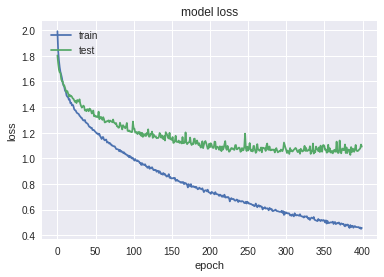

In [0]:
plt.plot(cnnhistory.history['loss'])
plt.plot(cnnhistory.history['val_loss'])
plt.title('model loss')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='upper left')
plt.show()

### Saving the model

In [0]:
model_name = 'Speech_Emotion_Recognition_Model.h5'
save_dir = os.path.join(os.getcwd(), 'Trained_Models')
# Save model and weights
if not os.path.isdir(save_dir):
    os.makedirs(save_dir)
model_path = os.path.join(save_dir, model_name)
model.save(model_path)
print('Saved trained model at %s ' % model_path)

Saved trained model at /content/drive/My Drive/Colab Notebooks/Emotion Speech Recognition/Trained_Models/Speech_Emotion_Recognition_Model.h5 


In [0]:
import json
model_json = model.to_json()
with open("model.json", "w") as json_file:
    json_file.write(model_json)

### Loading the model

In [0]:
# loading json and creating model
from keras.models import model_from_json
json_file = open('model.json', 'r')
loaded_model_json = json_file.read()
json_file.close()
loaded_model = model_from_json(loaded_model_json)
# load weights into new model
loaded_model.load_weights("./Trained_Models/Speech_Emotion_Recognition_Model.h5")
print("Loaded model from disk")
 
# evaluate loaded model on test data
loaded_model.compile(loss='categorical_crossentropy', optimizer=opt, metrics=['accuracy'])
score = loaded_model.evaluate(x_testcnn, y_test, verbose=0)
print("%s: %.2f%%" % (loaded_model.metrics_names[1], score[1]*100))

Loaded model from disk
acc: 60.16%


# 8. Test Set Prediction

### Predicting emotions on the test data

In [0]:
preds = loaded_model.predict(x_testcnn, 
                         batch_size=32, 
                         verbose=1)

512/512 [==============================] - 0s 240us/step


In [0]:
preds

array([[7.73647502e-02, 1.62941462e-03, 7.54934192e-01, ...,
        1.79233365e-02, 4.34931414e-03, 1.20712914e-01],
       [8.92097533e-01, 1.71545646e-04, 7.40063712e-02, ...,
        2.71559657e-06, 1.19082863e-03, 2.51185638e-03],
       [6.82796119e-03, 8.12463701e-01, 5.44474833e-03, ...,
        1.24781944e-01, 2.76436675e-02, 1.89810116e-02],
       ...,
       [4.78203903e-04, 4.08807039e-01, 5.25071323e-01, ...,
        4.04825583e-02, 1.22279739e-02, 2.95588491e-03],
       [1.01144286e-02, 1.21510660e-04, 4.13878888e-01, ...,
        5.96682958e-06, 1.07019171e-01, 1.23396167e-04],
       [5.99711621e-03, 3.37748937e-02, 1.96363047e-01, ...,
        1.91096100e-03, 4.89534531e-03, 7.13305235e-01]], dtype=float32)

In [0]:
preds1=preds.argmax(axis=1)

In [0]:
preds1

array([2, 0, 1, 3, 3, 0, 3, 5, 3, 5, 2, 2, 0, 4, 4, 3, 2, 5, 4, 5, 2, 6,
       3, 4, 0, 3, 0, 2, 2, 3, 3, 4, 5, 3, 1, 3, 5, 3, 2, 3, 5, 6, 4, 0,
       5, 1, 1, 5, 1, 5, 3, 3, 2, 2, 4, 5, 2, 2, 5, 4, 4, 0, 5, 0, 0, 3,
       5, 2, 0, 0, 3, 2, 6, 2, 4, 5, 5, 6, 0, 1, 5, 0, 0, 2, 3, 3, 6, 0,
       2, 2, 3, 0, 4, 2, 2, 6, 6, 5, 4, 2, 2, 5, 5, 5, 3, 5, 5, 3, 6, 3,
       2, 3, 0, 3, 4, 5, 2, 5, 2, 3, 5, 3, 6, 3, 0, 5, 6, 2, 5, 6, 5, 3,
       1, 3, 4, 3, 3, 0, 1, 4, 0, 0, 1, 2, 0, 0, 1, 5, 4, 2, 5, 5, 4, 0,
       5, 5, 4, 2, 2, 5, 0, 5, 5, 5, 0, 3, 4, 4, 3, 6, 6, 5, 6, 3, 6, 6,
       2, 2, 5, 5, 6, 0, 4, 6, 2, 2, 2, 2, 1, 0, 3, 3, 4, 6, 4, 1, 0, 6,
       2, 0, 0, 2, 5, 4, 6, 3, 4, 6, 0, 4, 3, 3, 2, 2, 4, 4, 5, 6, 5, 4,
       5, 4, 0, 3, 4, 4, 1, 5, 3, 0, 5, 5, 4, 4, 2, 2, 5, 5, 1, 3, 6, 5,
       5, 2, 5, 5, 5, 2, 1, 0, 1, 4, 2, 5, 2, 1, 1, 5, 3, 4, 3, 3, 4, 4,
       2, 6, 5, 1, 2, 2, 5, 4, 5, 5, 4, 3, 2, 3, 2, 0, 2, 2, 5, 0, 3, 5,
       3, 4, 5, 6, 5, 3, 4, 6, 5, 0, 5, 5, 5, 3, 5,

In [0]:
abc = preds1.astype(int).flatten()

In [0]:
predictions = (lb.inverse_transform((abc)))

In [0]:
preddf = pd.DataFrame({'predictedvalues': predictions})
preddf[:10]

,predictedvalues
0,2
1,0
2,1
3,3
4,3
5,0
6,3
7,5
8,3
9,5


In [0]:
actual=y_test.argmax(axis=1)
abc123 = actual.astype(int).flatten()
actualvalues = (lb.inverse_transform((abc123)))

In [0]:
actualdf = pd.DataFrame({'actualvalues': actualvalues})
actualdf[:10]

,actualvalues
0,2
1,0
2,1
3,2
4,3
5,6
6,6
7,5
8,3
9,5


In [0]:
finaldf = actualdf.join(preddf)

## Actual v/s Predicted emotions

In [0]:
finaldf[170:180]

,actualvalues,predictedvalues
170,6,6
171,1,5
172,1,6
173,4,3
174,3,6
175,1,6
176,6,2
177,0,2
178,2,5
179,5,5


In [0]:
finaldf.groupby('actualvalues').count()

,predictedvalues
actualvalues,
0,81
1,60
2,83
3,85
4,53
5,97
6,53


In [0]:
finaldf.groupby('predictedvalues').count()

,actualvalues
predictedvalues,
0,64
1,23
2,100
3,94
4,59
5,120
6,52


In [0]:
finaldf.to_csv('Predictions.csv', index=False)

# 9. Live Demonstration

#### The file 'output10.wav' in the next cell is the file that was recorded live using the code in AudioRecoreder notebook found in the repository

In [0]:
demo_audio_path = './demo_audio.wav'

In [0]:
demo_mfcc, demo_pitch, demo_mag, demo_chrom = get_audio_features(demo_audio_path,sampling_rate)

mfcc = pd.Series(demo_mfcc)
pit = pd.Series(demo_pitch)
mag = pd.Series(demo_mag)
C = pd.Series(demo_chrom)
demo_audio_features = pd.concat([mfcc,pit,mag,C],ignore_index=True)

In [0]:
demo_audio_features= np.expand_dims(demo_audio_features, axis=0)
demo_audio_features= np.expand_dims(demo_audio_features, axis=2)

In [0]:
demo_audio_features.shape

(1, 65, 1)

In [0]:
livepreds = loaded_model.predict(demo_audio_features, 
                         batch_size=32, 
                         verbose=1)

1/1 [==============================] - 0s 17ms/step


In [0]:
livepreds

array([[0.6706143 , 0.00370861, 0.11204807, 0.15404922, 0.00411796,
        0.02518239, 0.03027949]], dtype=float32)

In [0]:
# emotions=["anger","disgust","fear","happy","neutral", "sad", "surprise"]
index = livepreds.argmax(axis=1).item()
index

0

In [0]:
emotions[index]

'anger'

# Thank You !